In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from data import *
from plotting import *
from regression import *
from utils import *

In [3]:
results_dir = 'results/accessibility/8Oct/'
os.makedirs(results_dir, exist_ok=True)

In [4]:
# Load data
pcd_df = load_pcd_df()

access_df = pcd_df.dropna(subset=['Model accessibility'])
len(access_df)

1048

In [5]:
access_df.columns

Index(['System', 'Domain', 'Task', 'Authors', 'Notability criteria',
       'Notability criteria notes', 'Model accessibility', 'Link', 'Citations',
       'Reference', 'Publication date', 'Organization', 'Parameters',
       'Parameters notes', 'Training compute (FLOP)', 'Training compute notes',
       'Training dataset', 'Training dataset notes',
       'Training dataset size (datapoints)', 'Dataset size notes', 'Epochs',
       'Inference compute (FLOP)', 'Inference compute notes',
       'Training time (hours)', 'Training time notes', 'Training hardware',
       'Approach', 'Training compute cost (2020 USD)', 'Compute cost notes',
       'Compute sponsor categorization', 'Confidence', 'Abstract',
       'Last modified', 'Created By', 'Benchmark data', 'Exclude',
       'Country (from Organization)', 'Base model', 'Finetune compute (FLOP)',
       'Finetune compute notes', 'Hardware quantity', 'Hardware utilization',
       'Training cost trends', 'Training cloud compute vendor',
 

In [6]:
model_open_categories = ['Open access (unrestricted)', 'Open access (restricted use)', 'Open access (non-commercial)']
code_open_categories = ['Open source', 'Open access (non-commercial)', 'Open access (restricted use)']


# Add open/closed binary columns
access_df['Model open/closed'] = access_df['Model accessibility'].apply(
    lambda x: 'Open' if x in model_open_categories else 'Closed'
)

access_df['Code open/closed'] = access_df['Training code accessibility'].apply(
    lambda x: 'Open' if x in code_open_categories else 'Closed'
)

/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_25694/2896245806.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_df['Model open/closed'] = access_df['Model accessibility'].apply(
/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_25694/2896245806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_df['Code open/closed'] = access_df['Training code accessibility'].apply(


In [7]:
open_df = access_df.loc[access_df['Model open/closed'] == 'Open']

In [8]:
notable = open_df.loc[(open_df['Notability criteria'].notna())]
print(len(notable))
notable.head(10)

221


,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Difference,Difference (share),API prices,Created,Inference code accessibility,Arithmetic format,Model versions,Frontier model,Model open/closed,Code open/closed
338,Faster R-CNN,Vision,Object detection,"S Ren, K He, R Girshick, J Sun",Highly cited,NaN,Open access (unrestricted),https://arxiv.org/abs/1506.01497,54926.0,Faster R-CNN: Towards Real-Time Object Detecti...,...,0.000000e+00,NaN,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
354,SSD,Vision,Object detection,"Wei Liu, Dragomir Anguelov, Dumitru Erhan, Chr...",Highly cited,Also listed in Denis Panjuta's List of 100+ AI...,Open access (unrestricted),https://arxiv.org/pdf/1512.02325,39468.0,SSD: Single Shot MultiBox Detector,...,-1.229100e+19,-Infinity,NaN,7/31/2024 12:00am,NaN,NaN,NaN,NaN,Open,Closed
407,SPIDER2,Biology,"Protein folding prediction,Proteins","Yuedong Yang, Rhys Heffernan, Kuldip Paliwal, ...",SOTA improvement,"The method provides state-of-the-art, all-in-o...",Open access (non-commercial),https://link.springer.com/protocol/10.1007/978...,NaN,SPIDER2: A Package to Predict Secondary Struct...,...,1.822000e+16,100%,NaN,1/4/2024 8:36pm,NaN,NaN,NaN,NaN,Open,Closed
413,BIDAF,Language,Question answering,"Minjoon Seo, Aniruddha Kembhavi, Ali Farhadi, ...","Highly cited,SOTA improvement","""Our experimental evaluations show that our mo...",Open access (unrestricted),https://arxiv.org/abs/1611.01603v6,2246.0,Bidirectional Attention Flow for Machine Compr...,...,3.468614e+18,100%,NaN,2/1/2024 1:46pm,NaN,NaN,NaN,NaN,Open,Open
430,YOLOv2,Vision,Object detection,"Joseph Redmon, Ali Farhadi",Highly cited,NaN,Open access (non-commercial),https://arxiv.org/abs/1612.08242,14052.0,"YOLO9000: Better, Faster, Stronger",...,0.000000e+00,NaN,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Closed
513,ULM-FiT,Language,Text classification,"Jeremy Howard, Sebastian Ruder",Highly cited,NaN,Open access (unrestricted),https://arxiv.org/abs/1801.06146,1940.0,Universal Language Model Fine-tuning for Text ...,...,2.725380e+17,100%,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
529,LSTM (2018),Language,Language modelling,"Shaojie Bai, J. Zico Kolter, Vladlen Koltun",Highly cited,NaN,Open access (unrestricted),https://arxiv.org/abs/1803.01271,4024.0,An Empirical Evaluation of Generic Convolution...,...,0.000000e+00,NaN,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Open,Open
539,ResNeXt-101 32x48d,Vision,Image classification,"Dhruv Mahajan, Ross Girshick, Vignesh Ramanath...","Highly cited,SOTA improvement","""We show improvements on several image classif...",Open access (non-commercial),https://arxiv.org/abs/1805.00932,1275.0,Exploring the Limits of Weakly Supervised Pret...,...,8.743950e+21,100%,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,checked,Open,Open
551,GPT-1,Language,"Question answering,Text classification,Languag...","A Radford, K Narasimhan, T Salimans, I Sutskever",Highly cited,NaN,Open access (unrestricted),https://openai.com/blog/language-unsupervised/,9523.0,Improving Language Understanding by Generative...,...,1.757813e+19,100%,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
562,Big-Little Net,Vision,Image classification,"Chun-Fu Chen, Quanfu Fan, Neil Mallinar, Tom S...",SOTA improvement,"""On object recognition task, we demonstrated t...",Open access (unrestricted),https://arxiv.org/abs/1807.03848,90.0,Big-Little Net: An Efficient Multi-Scale Featu...,...,2.460480e+17,100%,NaN,10/4/2023 11:48am,NaN,NaN,NaN,NaN,Open,Open


In [9]:
non_notable = open_df.loc[(open_df['Notability criteria'].isna())]
print(len(non_notable))
non_notable.head(10)
# 251 open but not "notable"
# some of these are clearly lower-n notable, like Qwen2, DBRX, Gemma 2, DeepSeek coder
# possible other criteria - within 1 (or 1.5 or 2) OOM training compute of frontier (1.5 OOM is ~1e24 right now)
# greater than 1000 (or 1100) on chatbot arena?

263


,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Difference,Difference (share),API prices,Created,Inference code accessibility,Arithmetic format,Model versions,Frontier model,Model open/closed,Code open/closed
341,Skip-Thoughts,Language,Language modelling,"Ryan Kiros, Yukun Zhu, Ruslan Salakhutdinov, R...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1506.06726,NaN,Skip-Thought Vectors,...,0.000000e+00,NaN,NaN,5/9/2024 9:26am,NaN,NaN,NaN,NaN,Open,Open
348,The Attentive Reader,Language,Question answering,"Karl Moritz Hermann, Tomáš Kočiský, Edward Gre...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1506.03340,NaN,Teaching Machines to Read and Comprehend,...,0.000000e+00,NaN,NaN,5/9/2024 9:03am,NaN,NaN,NaN,NaN,Open,Open
366,Order-Embeddings of Images and Language,Vision,Image captioning,"Ivan Vendrov, Ryan Kiros, Sanja Fidler, Raquel...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1511.06361,NaN,Order-Embeddings of Images and Language,...,0.000000e+00,NaN,NaN,5/9/2024 8:43am,NaN,NaN,NaN,NaN,Open,Open
441,AlexNet + coordinating filters,Vision,Image classification,"Wei Wen, Cong Xu, Chunpeng Wu, Yandan Wang, Yi...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1703.09746,172.0,Coordinating Filters for Faster Deep Neural Ne...,...,1.557140e+18,100%,NaN,2/7/2024 11:30am,NaN,NaN,NaN,NaN,Open,Open
536,TF-LM-discourse LSTM (WT2),Language,Language modelling,"Lyan Verwimp, Hugo Van hamme, Patrick Wambacq",NaN,NaN,Open access (unrestricted),https://aclanthology.org/L18-1470.pdf,12.0,TF-LM: TensorFlow-based Language Modeling Toolkit,...,0.000000e+00,NaN,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Open,Open
537,TF-LM-discourse LSTM (PTB),Language,Language modelling,"Lyan Verwimp, Hugo Van hamme, Patrick Wambacq",NaN,NaN,Open access (unrestricted),https://aclanthology.org/L18-1470.pdf,12.0,TF-LM: TensorFlow-based Language Modeling Toolkit,...,0.000000e+00,NaN,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Open,Open
538,DNCON2,Biology,"Proteins,Protein folding prediction","Badri Adhikari, Jie Hou, Jianlin Cheng",NaN,NaN,Open access (unrestricted),https://academic.oup.com/bioinformatics/articl...,173.0,DNCON2: improved protein contact prediction us...,...,9.500000e+16,100%,NaN,1/4/2024 7:20am,NaN,NaN,NaN,NaN,Open,Open
555,DARTS (second order),Language,"Language modelling,Architecture search","Hanxiao Liu, Karen Simonyan, Yiming Yang",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1806.09055,NaN,DARTS: Differentiable Architecture Search,...,0.000000e+00,NaN,NaN,11/1/2023 9:05pm,NaN,NaN,NaN,NaN,Open,Open
563,Big-Little Net (vision),Vision,Object recognition,"Chun-Fu (Richard) Chen, Quanfu Fan, Neil Malli...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1807.03848,97.0,BIG-LITTLE NET: AN EFFICIENT MULTI-SCALE FEATU...,...,6.298829e+19,100%,NaN,1/22/2024 8:02am,NaN,NaN,NaN,NaN,Open,Open
571,(ensemble): AWD-LSTM-DOC (fin) × 5 (PTB),Language,Language modelling,"Sho Takase, Jun Suzuki, Masaaki Nagata",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/1808.10143,NaN,Direct Output Connection for a High-Rank Langu...,...,0.000000e+00,NaN,NaN,11/1/2023 9:05pm,NaN,NaN,NaN,NaN,Open,Open


In [10]:
print(f"Models that are not fine-tunes:  {len(open_df.loc[open_df['Base model'].isna()])}")
print(f"Models that are fine-tunes:  {len(open_df.loc[open_df['Base model'].notna()])}")
open_df.loc[open_df['Base model'].notna()].head(10)

Models that are not fine-tunes:  402
Models that are fine-tunes:  82


,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Difference,Difference (share),API prices,Created,Inference code accessibility,Arithmetic format,Model versions,Frontier model,Model open/closed,Code open/closed
354,SSD,Vision,Object detection,"Wei Liu, Dragomir Anguelov, Dumitru Erhan, Chr...",Highly cited,Also listed in Denis Panjuta's List of 100+ AI...,Open access (unrestricted),https://arxiv.org/pdf/1512.02325,39468.0,SSD: Single Shot MultiBox Detector,...,-1.229100e+19,-Infinity,NaN,7/31/2024 12:00am,NaN,NaN,NaN,NaN,Open,Closed
513,ULM-FiT,Language,Text classification,"Jeremy Howard, Sebastian Ruder",Highly cited,NaN,Open access (unrestricted),https://arxiv.org/abs/1801.06146,1940.0,Universal Language Model Fine-tuning for Text ...,...,2.725380e+17,100%,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
620,Cross-lingual alignment,Language,Translation,"Tal Schuster, Ori Ram, Regina Barzilay, and Am...",SOTA improvement,"""our method consistently outperforms the previ...",Open access (unrestricted),https://arxiv.org/abs/1902.09492,196.0,Cross-lingual alignment of contextual word emb...,...,2.560000e+18,100%,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
740,Theseus 6/768,Language,Text autocompletion,"Canwen Xu, Wangchunshu Zhou, Tao Ge, Furu Wei,...",SOTA improvement,"""Our approach outperforms existing knowledge d...",Open access (unrestricted),https://arxiv.org/abs/2002.02925,183.0,BERT-of-Theseus: Compressing BERT by Progressi...,...,-2.877000e+20,-Infinity,NaN,5/29/2023 2:06pm,NaN,NaN,NaN,NaN,Open,Open
890,Unicorn,Language,Question answering,"Nicholas Lourie, Ronan Le Bras, Chandra Bhagav...",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/2103.13009,NaN,UNICORN on RAINBOW: A Universal Commonsense Re...,...,0.000000e+00,0%,NaN,5/8/2024 2:32am,NaN,NaN,NaN,NaN,Open,Open
961,AlphaFold-Multimer,Biology,"Protein folding prediction,Proteins","Richard Evans, Michael O’Neill, Alexander Prit...","Highly cited,SOTA improvement","""On a benchmark dataset of 17 heterodimer prot...",Open access (unrestricted),https://www.biorxiv.org/content/10.1101/2021.1...,1640.0,Protein complex prediction with AlphaFold-Mult...,...,1.360000e+21,31%,NaN,1/4/2024 1:21am,NaN,NaN,NaN,NaN,Open,Open
986,Masked Autoencoders,Vision,"Semantic segmentation,Image classification,Ima...","Kaiming He, Xinlei Chen, Saining Xie, Yanghao ...","Highly cited,SOTA improvement","""By fine-tuning with a 448 size, we achieve 87...",Open access (non-commercial),https://arxiv.org/abs/2111.06377,5356.0,Masked Autoencoders Are Scalable Vision Learners,...,-3.802000e+21,-827%,NaN,4/10/2024 6:06pm,NaN,NaN,NaN,NaN,Open,Open
1006,Engine-XL(NE),"Language,Vision,Multimodal",Named entity recognition,"Zhongping Zhang, Yiwen Gu, Bryan A. Plummer",NaN,NaN,Open access (unrestricted),https://arxiv.org/abs/2112.05917,2.0,Show and Write: Entity-aware Article Generatio...,...,-1.920000e+21,-Infinity,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Open,Open
1013,Contriever,Language,Language modelling,"Gautier Izacard, Mathilde Caron, Lucas Hossein...",SOTA improvement,"""We observe that when\nused as pre-training, c...",Open access (non-commercial),https://arxiv.org/abs/2112.09118,506.0,Unsupervised Dense Information Retrieval with ...,...,-1.280000e+20,-82%,NaN,12/28/2023 3:16pm,NaN,NaN,NaN,NaN,Open,Open
1062,BERT-RBP,Biology,"Proteins,Protein interaction prediction","Keisuke Yamada, Michiaki Hamada",SOTA improvement,"""Our model outperformed state-of-the-art predi...",Open access (non-commercial),https://academic.oup.com/bioinformaticsadvance...,31.0,Prediction of RNA–protein interactions using a...,...,3.297800e+19,24%,NaN,1/4/2024 2:51am,NaN,NaN,NaN,NaN,Open,Open


In [11]:
notable_finetunes = open_df.loc[(open_df['Base model'].notna()) & (open_df['Notability criteria'].notna())]
print(len(notable_finetunes))
notable_finetunes[['System', 'Notability criteria']]
# 33 notable, fine-tuned open models

36


,System,Notability criteria
354,SSD,Highly cited
513,ULM-FiT,Highly cited
620,Cross-lingual alignment,SOTA improvement
740,Theseus 6/768,SOTA improvement
961,AlphaFold-Multimer,"Highly cited,SOTA improvement"
986,Masked Autoencoders,"Highly cited,SOTA improvement"
1013,Contriever,SOTA improvement
1062,BERT-RBP,SOTA improvement
1082,CogVideo,Historical significance
1136,BlenderBot 3,SOTA improvement


In [12]:
open_df.groupby('Domain').size().sort_values(ascending=False)

Domain
Language                                                    308
Biology                                                      44
Vision                                                       41
Multimodal,Language,Vision                                   14
Image generation                                             13
Speech                                                        9
Vision,Image generation                                       5
Language,Vision,Multimodal                                    5
Games                                                         4
Multimodal,Vision,Language                                    3
Audio                                                         3
Earth science                                                 3
Robotics                                                      2
Language,Multimodal,Vision                                    2
Video                                                         2
Language,Biology                 

# Model Accessibility Charts

In [13]:
# Add year column
access_df['Year'] = pd.to_datetime(access_df['Publication date']).dt.year


/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_25694/3747043736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  access_df['Year'] = pd.to_datetime(access_df['Publication date']).dt.year


In [14]:
# Input -  model counts, grouped by accessibility and by year
# Output - same dataframe with cumulative counts for status

def get_cumulative_counts(counts):
    
    counts['Cumulative for status'] = counts.groupby('Model accessibility')['Count'].cumsum()
    
    # Pivot the access counts table to get counts for every status and every year
    # This will have many NaN values because not every year has a model of every status
    counts_wide = counts.pivot(index='Year', columns='Model accessibility', values='Cumulative for status')
    all_years = pd.Series(range(counts_wide.index.min(), counts_wide.index.max() + 1))
    

    # Fill NaN values with 0. This ensures that the cumulative count does not get dropped in individual years 
    # where there are no models with a given status
    counts_wide_filled = counts_wide.reindex(all_years).ffill().fillna(0)
    counts_wide_filled = counts_wide_filled.reset_index(names=["Year"])
    

    # Unpivot to get cumulative totals
    counts_filled = (counts_wide_filled.melt(id_vars='Year', 
                                         var_name='Model accessibility', 
                                         value_name='Cumulative for status')
                                   .reset_index(drop=True))

    # sort from closed to open
    sort_order = ['Unreleased', 'Hosted access (no API)', 'API access', 'Open access (non-commercial)', 'Open access (restricted use)', 'Open access (unrestricted)']
    counts_filled['Category_sorted'] = pd.Categorical(counts_filled['Model accessibility'], categories=sort_order, ordered=True)
    counts_filled = counts_filled.sort_values(['Category_sorted', 'Year'])

    return counts_filled

In [15]:
# Get counts of all models by year and model accessibility
# Only include 2015 and later because older models are rare
access_counts = access_df.loc[access_df['Year'] >= 2015].groupby(['Year', 'Model accessibility']).size().reset_index(name='Count')

cumulative_access_counts = get_cumulative_counts(access_counts)

# Cumulative area chart
fig = px.area(cumulative_access_counts, x='Year', y='Cumulative for status', color='Model accessibility', line_group='Model accessibility',
              labels={'Cumulative for status': 'Cumulative Count', 'Year': 'Year'},
              title='Model count by accessibility over time')

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)

# save_plot(fig, results_dir, f'cumulative_model_count_by_accessibility')

fig.show()

Commentary: around half of models are unreleased as of 2024, but the proportion has been shrinking over time. Before 2018 or so, releasing model weights was rare (academic projects often shared training code, but not weights)

In [16]:
notable_df = access_df.loc[(access_df['Notability criteria'].notna())]

# Get counts of notable models by year and model accessibility
# Only include 2015 and later because older models are rare
notable_counts = notable_df.loc[access_df['Year'] >= 2015].groupby(['Year', 'Model accessibility']).size().reset_index(name='Count')

cumulative_notable_counts = get_cumulative_counts(notable_counts)

In [17]:
# Input -  model counts, grouped by accessibility and by year
# Output - same dataframe with cumulative counts for status, cumulative total across all statuses, and proportion
def normalize_counts(access_counts):
    
    # Get df with total models per year, and cumulative totals
    total_counts = access_counts.groupby('Year')['Count'].sum().reset_index(name='Yearly Total')
    total_counts['Cumulative Total'] = total_counts['Yearly Total'].cumsum()
    
    # Pivot the access counts table to get counts for every status and every year
    # This will have many NaN values because not every year has a model of every status
    access_counts_wide = access_counts.pivot(index='Year', columns='Model accessibility', values='Cumulative for status')
    all_years = pd.Series(range(access_counts_wide.index.min(), access_counts_wide.index.max() + 1))

    # Fill in the NaN values
    access_counts_wide_filled = access_counts_wide.reindex(all_years).ffill().fillna(0)
    access_counts_wide_filled = access_counts_wide_filled.reset_index(names=["Year"])
    
    # Unpivot
    access_counts_filled = (access_counts_wide_filled.melt(id_vars='Year', 
                                     var_name='Model accessibility', 
                                     value_name='Cumulative for status')
                               .reset_index(drop=True))
    
    # Join with total counts df to get the cumulative totals
    normalized_counts = pd.merge(access_counts_filled, total_counts, on='Year')
    
    # Divide annual counts by cumulative counts to find cumulative proportions by year
    normalized_counts['proportion'] = normalized_counts['Cumulative for status'] / normalized_counts['Cumulative Total']
    
    # Sort using custom order
    sort_order = ['Unreleased', 'Hosted access (no API)', 'API access', 'Open access (non-commercial)', 'Open access (restricted use)', 'Open access (unrestricted)']
    normalized_counts['Category_sorted'] = pd.Categorical(normalized_counts['Model accessibility'], categories=sort_order, ordered=True)
    normalized_counts = normalized_counts.sort_values(['Category_sorted', 'Year'])
    
    return normalized_counts

In [18]:
normalized_counts_total = normalize_counts(access_counts)
normalized_counts_notable = normalize_counts(notable_counts)

In [19]:
# Create a 1x2 subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Cumulative count',
                                                    'Cumulative proportion'))

# Define a consistent color palette
color_palette = {
    'Unreleased': '#d62728',
    'Hosted access (no API)': '#ff7f0e',
    'API access': '#8c564b',
    'Open access (non-commercial)': '#9467bd',
    'Open access (restricted use)': '#1f77b4',
    'Open access (unrestricted)': '#2ca02c'
}

# Cumulative area chart
for accessibility in cumulative_notable_counts['Model accessibility'].unique():
    fig.add_trace(
        go.Scatter(x=cumulative_notable_counts[cumulative_notable_counts['Model accessibility'] == accessibility]['Year'], 
                y=cumulative_notable_counts[cumulative_notable_counts['Model accessibility'] == accessibility]['Cumulative for status'], 
                hoverinfo='x+y',
                stackgroup='one',
                mode='lines',
                name=accessibility,
                line=dict(color=color_palette[accessibility])),
        row=1, col=1
    )

# Normalized area chart
for accessibility in normalized_counts_notable['Model accessibility'].unique():
    fig.add_trace(
        go.Scatter(x=normalized_counts_notable[normalized_counts_notable['Model accessibility'] == accessibility]['Year'], 
                y=normalized_counts_notable[normalized_counts_notable['Model accessibility'] == accessibility]['proportion'], 
                hoverinfo='x+y',
                stackgroup='one',
                mode='lines',
                name=accessibility,
                line=dict(color=color_palette[accessibility]),
                showlegend=False),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title_text='Notable models accessibility over time',
    showlegend=True
)

# Update x and y axes
fig.update_xaxes(title_text='Year', range=[2018, 2024], row=1, col=1)
fig.update_xaxes(title_text='Year', range=[2018, 2024], row=1, col=2)
fig.update_yaxes(title_text='Cumulative count', row=1, col=1)
fig.update_yaxes(title_text='Cumulative proportion', range=[0, 1], row=1, col=2)

save_plot(fig, results_dir, f'cumulative_model_count_by_accessibility')

fig.show()

This chart shows the proportions over time more clearly - open weights have never been very rare (at least 10%). But open models have become much more common over time, making up around half of models today. The large majority of those are permissively licensed ("Open access (unrestricted)") even today but open with restrictions has become more common over time.

In [20]:
fig = px.area(normalized_counts_notable, x='Year', y='proportion', color='Model accessibility', line_group='Model accessibility',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative proportion of notable models by accessibility over time')

fig.update_yaxes(range=[0, 1])
fig.update_xaxes(range=[2018, 2024])
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)

save_plot(fig, results_dir, f'notable_model_proportion_by_accessibility')

fig.show()

In [21]:
normalized_counts_notable.to_csv(results_dir + 'notable_model_proportion_by_accessibility.csv', index=False)

In [22]:
fig = px.area(normalized_counts_total, x='Year', y='proportion', color='Model accessibility', line_group='Model accessibility',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative proportion of all models by accessibility over time')

fig.update_yaxes(range=[0, 1])
fig.update_xaxes(range=[2018, 2024])
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)
# save_plot(fig, results_dir, f'proportion_by_accessibility')
fig.show()

# Code vs Model Accessibility

In [23]:
print(f"There are {len(access_df[access_df['Training code accessibility'].isna()])} models with marked code access and unmarked code access")

There are 136 models with marked code access and unmarked code access


In [24]:
# filter for code accessibility
code_df = access_df.dropna(subset=['Training code accessibility'])

In [25]:
code_df.head(8)

,System,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Difference (share),API prices,Created,Inference code accessibility,Arithmetic format,Model versions,Frontier model,Model open/closed,Code open/closed,Year
103,Deep Blue,Games,Chess,"Murray Campbell, A. Joseph Hoane Jr., Feng-hsi...","Historical significance,Highly cited","Defeated Kasparov in 1997, which was a famous ...",Unreleased,https://www.sciencedirect.com/science/article/...,1992.0,Deep Blue,...,NaN,NaN,4/4/2024 8:33am,NaN,NaN,NaN,NaN,Closed,Closed,1997
114,Credibilty Network,Vision,"Character recognition,Image classification","Geoffrey E. Hinton, Zoubin Ghahramani, Vee Why...",NaN,NaN,Unreleased,https://proceedings.neurips.cc/paper_files/pap...,NaN,Learning to Parse Images,...,100%,NaN,4/30/2024 10:13pm,NaN,NaN,NaN,NaN,Closed,Closed,1999
242,LBL,Language,NaN,"Andriy Mnih, Yee Whye Teh",NaN,NaN,Unreleased,https://arxiv.org/abs/1206.6426,835.0,A Fast and Simple Algorithm for Training Neura...,...,100%,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Closed,Closed,2012
247,LSTM-300units,Language,NaN,"Martin Sundermeyer, Ralf Schlüter, Hermann Ney",Highly cited,NaN,Unreleased,https://www.isca-archive.org/interspeech_2012/...,2503.0,LSTM Neural Networks for Language Modeling,...,NaN,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Closed,Closed,2012
249,RNN+LDA+KN5+cache,Language,NaN,"Tomas Mikolov, Geoffrey Zweig",SOTA improvement,"""We report perplexity results on the Penn Tree...",Unreleased,https://www.microsoft.com/en-us/research/wp-co...,716.0,Context dependent recurrent neural network lan...,...,NaN,NaN,9/26/2023 9:12pm,NaN,NaN,NaN,NaN,Closed,Closed,2012
250,RNN+LDA,Language,NaN,"Tomas Mikolov, Geoffrey Zweig",NaN,NaN,Unreleased,https://www.microsoft.com/en-us/research/wp-co...,NaN,Context dependent recurrent neural network lan...,...,NaN,NaN,11/1/2023 9:05pm,NaN,NaN,NaN,NaN,Closed,Closed,2012
251,RNN+LSA+KN5+cache (model combination w/ linear...,Language,NaN,"Tomas Mikolov, Geoffrey Zweig",NaN,NaN,Unreleased,https://www.microsoft.com/en-us/research/wp-co...,NaN,Context dependent recurrent neural network lan...,...,NaN,NaN,11/1/2023 9:05pm,NaN,NaN,NaN,NaN,Closed,Closed,2012
252,RNN,Language,NaN,"Tomas Mikolov, Geoffrey Zweig",NaN,NaN,Unreleased,https://www.microsoft.com/en-us/research/wp-co...,NaN,Context dependent recurrent neural network lan...,...,NaN,NaN,11/1/2023 9:05pm,NaN,NaN,NaN,NaN,Closed,Closed,2012


In [26]:
model_counts = code_df.groupby('Model accessibility').size().reset_index(name='Counts')
model_counts

,Model accessibility,Counts
0,API access,41
1,Hosted access (no API),25
2,Open access (non-commercial),79
3,Open access (restricted use),58
4,Open access (unrestricted),274
5,Unreleased,435


In [27]:
code_counts = code_df.groupby('Training code accessibility').size().reset_index(name='Counts')
code_counts

,Training code accessibility,Counts
0,Open access (non-commercial),77
1,Open access (restricted use),7
2,Open source,341
3,Unreleased,487


In [28]:
grouped_counts = code_df.groupby(['Model accessibility', 'Training code accessibility']).size().reset_index(name='Counts')
pivoted = grouped_counts.pivot(index='Model accessibility', columns='Training code accessibility', values='Counts').fillna(0)

# code access against model access
pivoted

Training code accessibility,Open access (non-commercial),Open access (restricted use),Open source,Unreleased
Model accessibility,,,,
API access,0.0,0.0,0.0,41.0
Hosted access (no API),1.0,0.0,1.0,23.0
Open access (non-commercial),37.0,1.0,17.0,24.0
Open access (restricted use),0.0,4.0,13.0,41.0
Open access (unrestricted),2.0,1.0,202.0,69.0
Unreleased,37.0,1.0,108.0,289.0


In [29]:
model_code_counts = code_df.groupby(['Model open/closed', 'Code open/closed']).size().reset_index(name='Counts')
model_code_counts = model_code_counts.pivot(index='Model open/closed', columns='Code open/closed', values='Counts')

# code open vs model open
model_code_counts

Code open/closed,Closed,Open
Model open/closed,,
Closed,353,148
Open,134,277


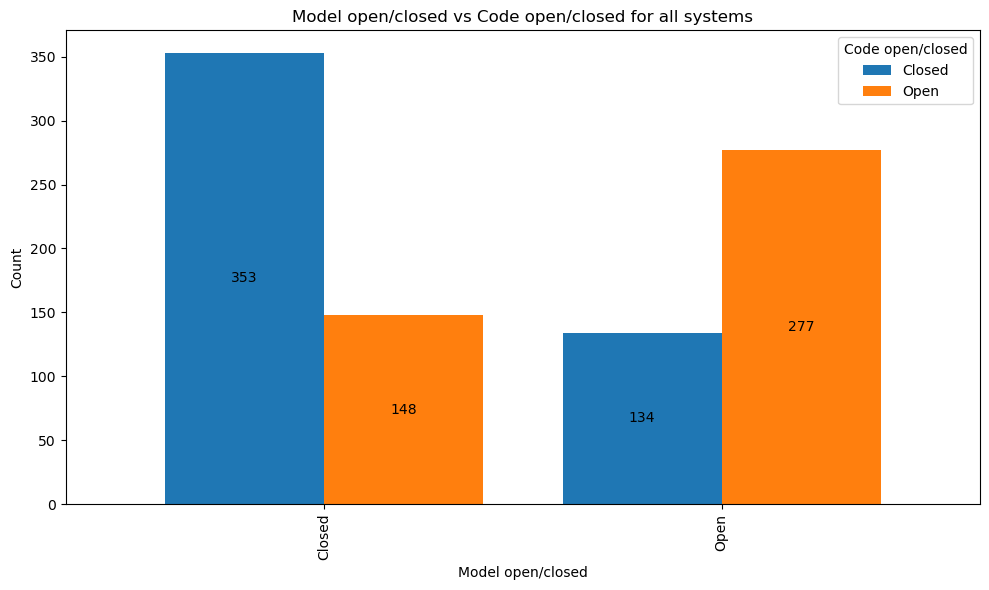

In [30]:
ax = model_code_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

# Customize the chart
plt.title('Model open/closed vs Code open/closed for all systems')
plt.ylabel('Count')


# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

In [31]:
import plotly.graph_objects as go

# Data
z = [[329, 148],
     [124, 275]]

fig = go.Figure(data=go.Heatmap(
    z=model_code_counts.values,
    x=model_code_counts.columns,
    y=model_code_counts.index,
    hoverongaps = False,
    text=z,
    texttemplate="%{text}",
    textfont={"size":20},
    colorscale='Blues'
))

fig.update_layout(
    autosize=False,
    width=400,
    height=300,
    title='Model and training code accessibility',
    xaxis_title='Code open/closed',
    yaxis_title='Model open/closed'
)

save_plot(fig, results_dir, f'model_code_accessibility_heatmap')

fig.show()

Model openness and code openness are reasonably correlated - most closed-weight models have closed code, while somewhat more open models have open code than closed code. This also applies across the other direction - most closed code models have closed weights, most open code models have open weights.

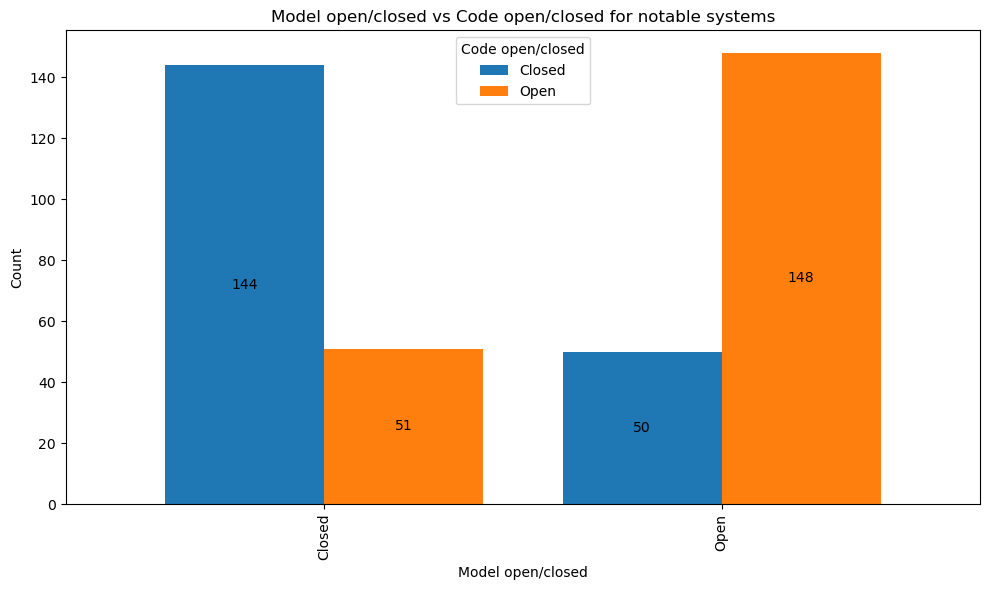

In [32]:
notable_code_df = code_df.loc[(code_df['Notability criteria'].notna())]

notable_open_counts = notable_code_df.groupby(['Model open/closed', 'Code open/closed']).size().reset_index(name='Counts')
notable_open_counts = notable_open_counts.pivot(index='Model open/closed', columns='Code open/closed', values='Counts')

ax = notable_open_counts.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Model open/closed vs Code open/closed for notable systems')
plt.ylabel('Count')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()
plt.show()

In [33]:
open_counts = code_df.loc[code_df['Year'] >= 2015].groupby(['Year', 'Model open/closed', 'Code open/closed']).size().reset_index(name='Count')

open_counts['Cumulative'] = open_counts.groupby(['Model open/closed', 'Code open/closed'])['Count'].cumsum()

open_counts.head(10)

,Year,Model open/closed,Code open/closed,Count,Cumulative
0,2015,Closed,Closed,7,7
1,2015,Closed,Open,1,1
2,2015,Open,Open,3,3
3,2016,Closed,Closed,19,26
4,2016,Closed,Open,3,4
5,2016,Open,Closed,1,1
6,2016,Open,Open,2,5
7,2017,Closed,Closed,21,47
8,2017,Closed,Open,13,17
9,2017,Open,Open,1,6


In [34]:
total_counts = open_counts.groupby('Year')['Count'].sum().reset_index(name='Yearly Total')
total_counts['Cumulative Total'] = total_counts['Yearly Total'].cumsum()
total_counts

,Year,Yearly Total,Cumulative Total
0,2015,11,11
1,2016,25,36
2,2017,35,71
3,2018,65,136
4,2019,138,274
5,2020,91,365
6,2021,138,503
7,2022,119,622
8,2023,191,813
9,2024,79,892


In [35]:
open_counts_wide = open_counts.pivot(index='Year', columns=['Model open/closed', 'Code open/closed'], values='Count')
open_counts_wide = open_counts_wide.fillna(0).reset_index()
open_counts_wide

Model open/closed  Year Closed        Open       
Code open/closed        Closed  Open  Open Closed
0                  2015    7.0   1.0   3.0    0.0
1                  2016   19.0   3.0   2.0    1.0
2                  2017   21.0  13.0   1.0    0.0
3                  2018   32.0  11.0  21.0    1.0
4                  2019   56.0  36.0  37.0    9.0
5                  2020   40.0  15.0  30.0    6.0
6                  2021   50.0  30.0  50.0    8.0
7                  2022   30.0  22.0  49.0   18.0
8                  2023   50.0  11.0  70.0   60.0
9                  2024   32.0   2.0  14.0   31.0

In [36]:
print(open_counts_wide.columns.to_list())
print(open_counts_wide.index.names)

[('Year', ''), ('Closed', 'Closed'), ('Closed', 'Open'), ('Open', 'Open'), ('Open', 'Closed')]
[None]


In [37]:
# Convert pivoted multi-columns to single columns with clear names
new_columns = ['Year'] + [f'Model {outer} Code {inner}' for outer, inner in open_counts_wide.columns[1:]]
open_counts_wide.columns = new_columns

open_counts_wide

,Year,Model Closed Code Closed,Model Closed Code Open,Model Open Code Open,Model Open Code Closed
0,2015,7.0,1.0,3.0,0.0
1,2016,19.0,3.0,2.0,1.0
2,2017,21.0,13.0,1.0,0.0
3,2018,32.0,11.0,21.0,1.0
4,2019,56.0,36.0,37.0,9.0
5,2020,40.0,15.0,30.0,6.0
6,2021,50.0,30.0,50.0,8.0
7,2022,30.0,22.0,49.0,18.0
8,2023,50.0,11.0,70.0,60.0
9,2024,32.0,2.0,14.0,31.0


In [38]:
# unpivot table to get the count of each 2x2 value for each year
open_counts_filled = (open_counts_wide.melt(id_vars=['Year'], 
                                            var_name='Category',
                                            value_name='Count')
                                      .reset_index(drop=True))

open_counts_filled.head(20)

,Year,Category,Count
0,2015,Model Closed Code Closed,7.0
1,2016,Model Closed Code Closed,19.0
2,2017,Model Closed Code Closed,21.0
3,2018,Model Closed Code Closed,32.0
4,2019,Model Closed Code Closed,56.0
5,2020,Model Closed Code Closed,40.0
6,2021,Model Closed Code Closed,50.0
7,2022,Model Closed Code Closed,30.0
8,2023,Model Closed Code Closed,50.0
9,2024,Model Closed Code Closed,32.0


In [39]:
open_counts_filled['Cumulative for Category'] = open_counts_filled.groupby('Category')['Count'].cumsum()

with_totals = pd.merge(open_counts_filled, total_counts, on="Year")
with_totals['proportion'] = with_totals['Cumulative for Category'] / with_totals['Cumulative Total']
with_totals.head(20)

,Year,Category,Count,Cumulative for Category,Yearly Total,Cumulative Total,proportion
0,2015,Model Closed Code Closed,7.0,7.0,11,11,0.636364
1,2016,Model Closed Code Closed,19.0,26.0,25,36,0.722222
2,2017,Model Closed Code Closed,21.0,47.0,35,71,0.661972
3,2018,Model Closed Code Closed,32.0,79.0,65,136,0.580882
4,2019,Model Closed Code Closed,56.0,135.0,138,274,0.492701
5,2020,Model Closed Code Closed,40.0,175.0,91,365,0.479452
6,2021,Model Closed Code Closed,50.0,225.0,138,503,0.447316
7,2022,Model Closed Code Closed,30.0,255.0,119,622,0.409968
8,2023,Model Closed Code Closed,50.0,305.0,191,813,0.375154
9,2024,Model Closed Code Closed,32.0,337.0,79,892,0.377803


In [40]:
# sort using custom order
sort_order = ['Model Closed Code Closed', 'Model Closed Code Open', 'Model Open Code Closed', 'Model Open Code Open']

with_totals['Category_sorted'] = pd.Categorical(with_totals['Category'], categories=sort_order, ordered=True)
with_totals = with_totals.sort_values('Category_sorted')


colors = ['crimson', 'tomato', 'blue', 'dodgerblue']
fig = px.area(with_totals, x='Year', y='proportion', color='Category', line_group='Category',
              labels={'proportion': 'Proportion', 'Year': 'Year', 'Category': 'Accessibility'},
              title='Model and training code accessibility over time', color_discrete_sequence=colors)

fig.update_yaxes(range=[0, 1])
fig.update_xaxes(range=[2018, 2024])
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)

save_plot(fig, results_dir, f'model_code_accessibility_over_time')

fig.show()

In [41]:
with_totals.to_csv(results_dir + 'model_code_accessibility_over_time.csv', index=False)

This chart shows the proportions across the four categories of model open/closed and code open/closed. The blue areas are open-weight models and the red areas are closed-weight, while the lighter colors are code open and the darker colors are code closed. Among open-weight models, code closed has become more common. Intuitively, this is consistent with the rise of the commercial open-source industry, which releases model weights but does not wish to give competitors the ability to recreate their base models.

In [42]:
# repeat the above code but with notable models only
open_counts = notable_code_df.loc[code_df['Year'] >= 2015].groupby(['Year', 'Model open/closed', 'Code open/closed']).size().reset_index(name='Count')

open_counts['Cumulative'] = open_counts.groupby(['Model open/closed', 'Code open/closed'])['Count'].cumsum()

total_counts = open_counts.groupby('Year')['Count'].sum().reset_index(name='Yearly Total')
total_counts['Cumulative Total'] = total_counts['Yearly Total'].cumsum()

open_counts_wide = open_counts.pivot(index='Year', columns=['Model open/closed', 'Code open/closed'], values='Count')
open_counts_wide = open_counts_wide.fillna(0).reset_index()

# Convert pivoted multi-columns to single columns with clear names
new_columns = ['Year'] + [f'Model {outer} Code {inner}' for outer, inner in open_counts_wide.columns[1:]]
open_counts_wide.columns = new_columns

# unpivot table to get the count of each 2x2 value for each year
open_counts_filled = (open_counts_wide.melt(id_vars=['Year'], 
                                            var_name='Category',
                                            value_name='Count')
                                      .reset_index(drop=True))

open_counts_filled['Cumulative for Category'] = open_counts_filled.groupby('Category')['Count'].cumsum()

with_totals = pd.merge(open_counts_filled, total_counts, on="Year")
with_totals['proportion'] = with_totals['Cumulative for Category'] / with_totals['Cumulative Total']

# sort using custom order
sort_order = ['Model Closed Code Closed', 'Model Closed Code Open', 'Model Open Code Closed', 'Model Open Code Open']

with_totals['Category_sorted'] = pd.Categorical(with_totals['Category'], categories=sort_order, ordered=True)
with_totals = with_totals.sort_values('Category_sorted')


colors = ['crimson', 'tomato', 'blue', 'dodgerblue']
fig = px.area(with_totals, x='Year', y='proportion', color='Category', line_group='Category',
              labels={'proportion': 'Proportion', 'Year': 'Year'},
              title='Cumulative Proportion of Notable Models by Open Closed Status', color_discrete_sequence=colors)

fig.update_yaxes(range=[0, 1])
fig.update_xaxes(range=[2018, 2024])
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title_x=0.2,
)
fig